# Exploratory Data Analysis

### Import Dependencies

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Load Dataset
Loads the training features and labels into Pandas dataframes, and merges them into a single dataframe. Note that `status_group` is our feature column in the combined dataframe.

In [60]:
train_df = pd.read_csv("Datasets/train_features.csv", parse_dates = ['date_recorded' ])
labels = pd.read_csv("Datasets/train_labels.csv")
train_df = pd.merge(train_df, labels, on='id')


train_df["status_group"].replace("functional", "Functional", inplace=True)
train_df["status_group"].replace("non functional", "Non-Functional", inplace=True)
train_df["status_group"].replace("functional needs repair", "Needs Repair", inplace=True)

### Water Pump Functionality
Chart showing the distribution of the target label.

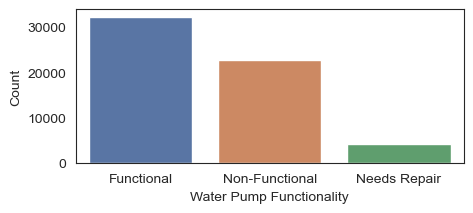

In [61]:
sns.set_style("white")

value_counts = train_df["status_group"].value_counts().reset_index()
value_counts.columns = ["Functionality", "Count"]
fig, ax = plt.subplots(figsize=(5,2))

sns.set_palette("deep")
sns.barplot(data=value_counts, x="Functionality", y="Count", ax=ax)

plt.xlabel('Water Pump Functionality')

plt.ylabel('Count')
plt.title('')
plt.show()

### Water Pump Functionality by Construction Year

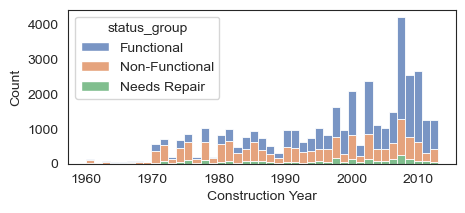

In [62]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(5,2))
figure = sns.histplot(data=train_df[train_df['construction_year'] != 0], ax=ax, x='construction_year', hue='status_group', fill='True', multiple='stack')
plt.xlabel('Construction Year')
plt.show()

### Water Pump Functionality by Water Quantity

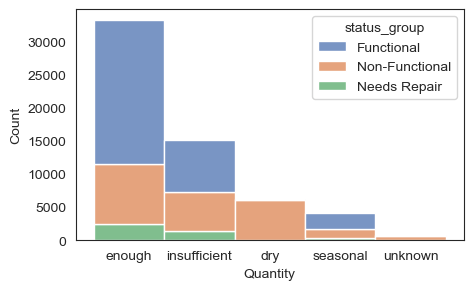

In [63]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(5,3))
figure = sns.histplot(train_df, x='quantity', hue='status_group', multiple='stack', ax=ax)
plt.xlabel('Quantity')
plt.show()

### Missing Value Percentage by Feature

Text(0.5, 1.0, 'Percentage of missing values by column')

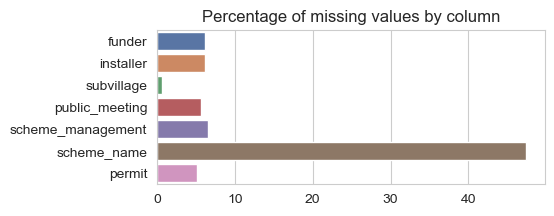

In [64]:
missing_counts = train_df.isnull().sum()
missing_proportions = missing_counts/len(train_df)*100

missing_proportions = missing_proportions.drop(index=missing_proportions[missing_proportions == 0].index)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5,2))
sns.barplot(y=missing_proportions.index, x=missing_proportions.values, ax=ax)
plt.title("Percentage of missing values by column")


### Zero Value Percentage by Numerical Feature

amount_tsh
gps_height
longitude
latitude
num_private
region_code
district_code
population


Text(0.5, 1.0, 'Percentage of values equal to zero by column')

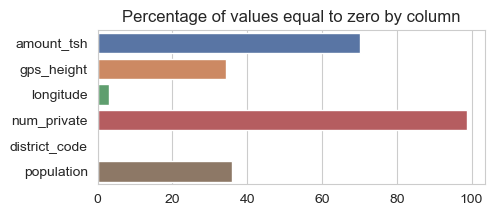

In [65]:
# Calculate the percentage of values equal to the mode for each column
percentages = {}
for column in train_df.select_dtypes(include=['int64', 'float64']).columns[1:-1]:
    print(column)
    zero_count = (train_df[column] == 0).sum()
    total_count = train_df[column].count()
    percentage = zero_count / total_count * 100
    if percentage > 0:
        percentages[column] = percentage
# Print the result
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5,2))
sns.barplot(y=list(percentages.keys()), x=list(percentages.values()), ax=ax)
plt.title("Percentage of values equal to zero by column")

### Distribution of Numerical Features

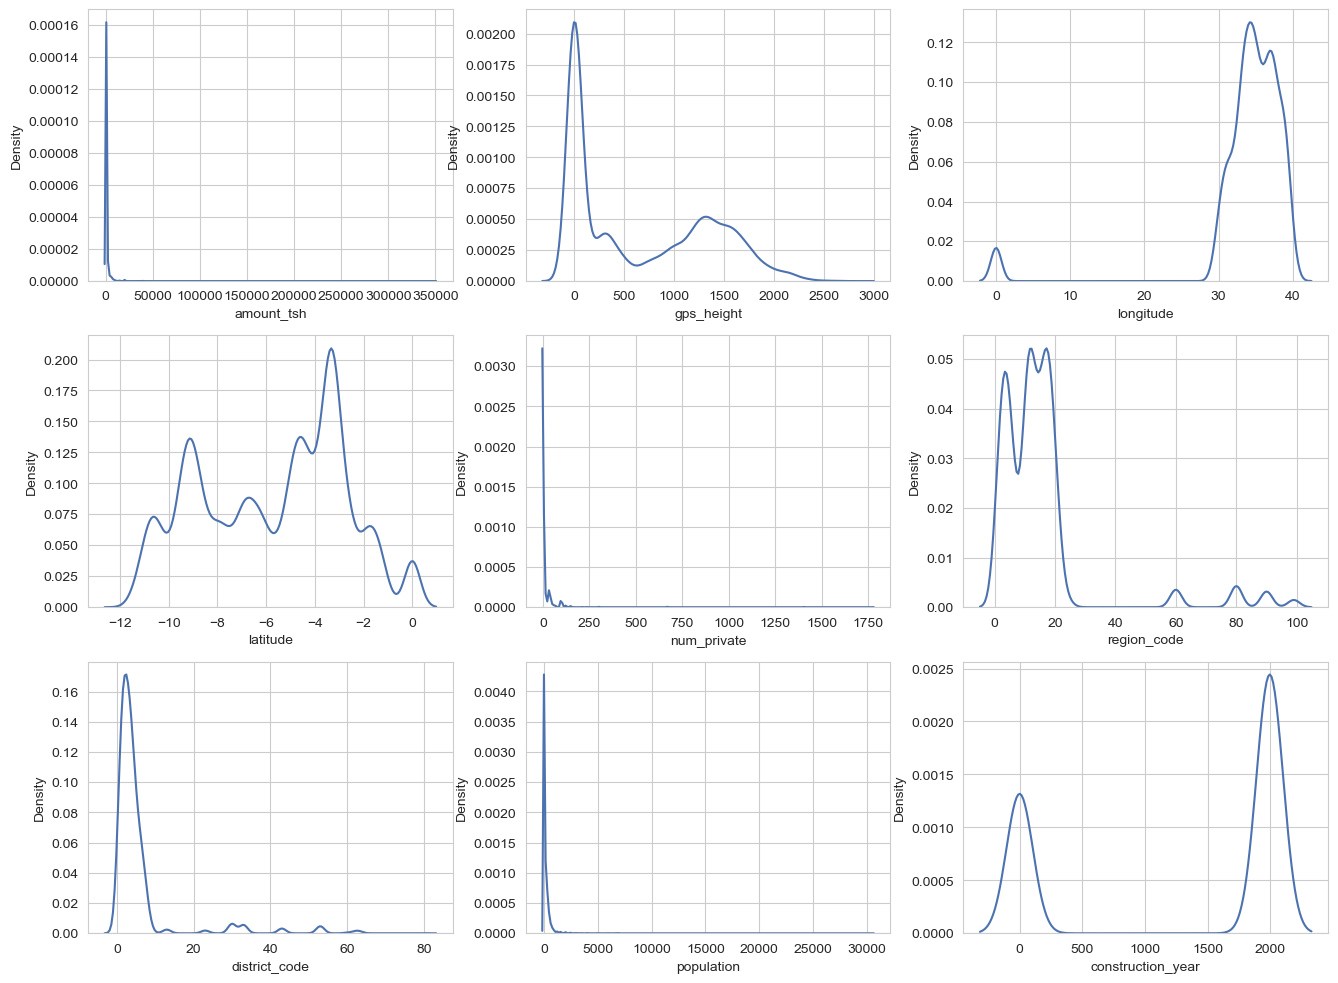

In [66]:
%matplotlib inline
fig, axs = plt.subplots(3,3, figsize=(16, 12))

for i, column in enumerate(train_df.select_dtypes(include=['int64', 'float64']).columns[1:]):

    x = train_df[column]

    # print(i, column)

    if column in list(percentages.keys()):
        # print('1:',len(y))
        y = train_df.loc[train_df[column] != 0, column]
        # print('2:',len(y))
    if column in list(missing_proportions.index):
        # print('3:',len(y))
        y = train_df.loc[train_df[column].notnull(), column]
        print('4:',len(y))

    sns.kdeplot(ax=axs[i//3, i%3], x=x)
    

### Distribution of Categorical Features

basin
scheme_management
extraction_type
extraction_type_group
extraction_type_class
management
management_group
payment
payment_type
water_quality
quality_group
quantity
quantity_group
source
source_type
waterpoint_type


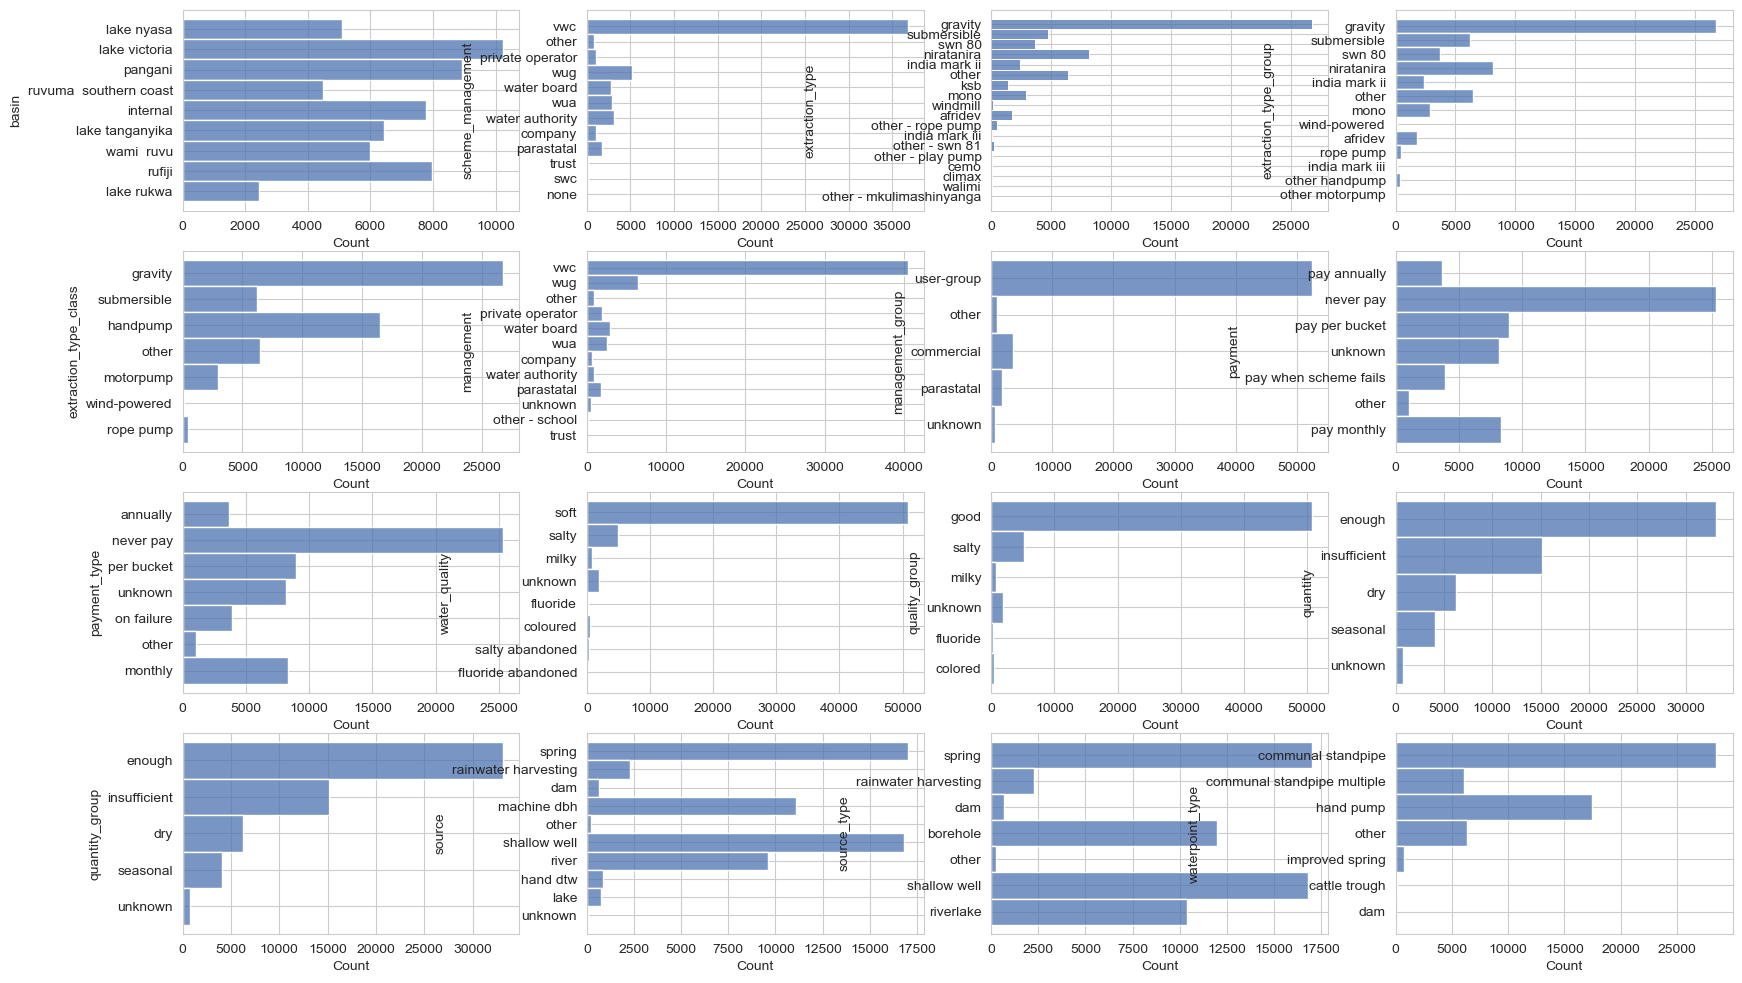

In [67]:
%matplotlib inline
import re

fig, axs = plt.subplots(4,4, figsize=(20, 12))
i=0

for column in train_df.select_dtypes(exclude=['int64', 'float64']).columns[:-2]:

    if train_df[column].unique().size < 20 and train_df[column].unique().size > 3:
        x = train_df[column]
        
        print(column)
        # filter out weird characters and change to lowercase
        x = x.apply(lambda x: re.sub(r"[^\w\s\-]*", '', x.lower()) if type(x) == str else x)
        
        sns.histplot(ax=axs[i//4, i%4], y=x)
        i += 1

### Proportion of Functional Pumps by Construction Year
X-axis: Construction Year

Y-axis: Ratio of functional to non-functional pumps constructed in a given year

Hue: Number of pumps constructed in a given year.

<Axes: xlabel='year', ylabel='proportion'>

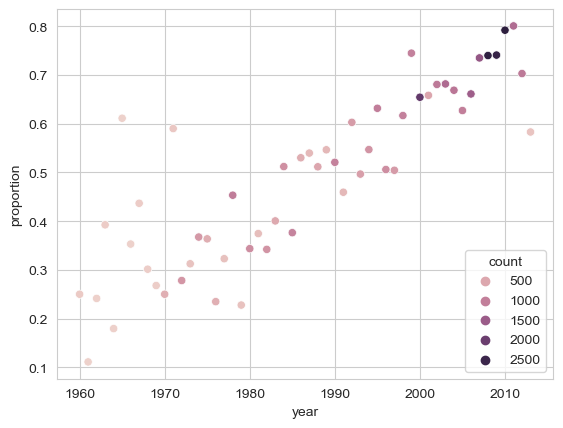

In [68]:
# Count rows with the same construction_year
construction_year_counts = pd.DataFrame(train_df['construction_year'].value_counts(), index=None)
construction_year_counts.columns = ['count']


# Show distribution of all classes in status_group column for each construction year
for year in construction_year_counts.index:
    construction_year_counts.loc[construction_year_counts.index == year, 'func_counts'] = len(train_df[(train_df['construction_year'] == year) & (train_df['status_group'] == 'Functional')])
    construction_year_counts.loc[construction_year_counts.index == year, 'nonfunc_counts'] = len(train_df[(train_df['construction_year'] == year) & (train_df['status_group'] == 'Non-Functional')])
    construction_year_counts.loc[construction_year_counts.index == year, 'proportion'] = construction_year_counts['func_counts']/(construction_year_counts['func_counts']+construction_year_counts['nonfunc_counts'])

#print(construction_year_counts)
# add a column of incremental index
construction_year_counts.reset_index(drop=False, inplace=True)
construction_year_counts.rename(index=str, columns={'index': 'year'}, inplace=True)

construction_year_counts.drop(index='0', inplace=True)
construction_year_counts

construction_year_counts.sort_values(by=['year'])
sns.scatterplot(construction_year_counts, x='year', y='proportion', hue='count')


### Pearson's Correlation Matrix
This was generated on the pre-processed dataframe, with correctly encoded values. See `Preprocessing.ipynb` to see how we did this.

C:\Users\Adam\AppData\Local\Temp\ipykernel_16112\2114124129.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  train_set = pd.read_csv("Datasets/final_df.csv")
C:\Users\Adam\AppData\Local\Temp\ipykernel_16112\2114124129.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mean = train_set.corr(method = 'pearson')


Index(['Unnamed: 0', 'id', 'status_group', 'funder', 'installer', 'basin',
       'region_code', 'public_meeting', 'payment_type', 'water_quality',
       'quantity', 'source_type', 'longitude', 'permit', 'population', 'age',
       'season', 'amount_tsh_missing', 'region_district', 'latitude_rounded',
       'gps_height_rounded', 'extraction_type_engineered',
       'extraction_type_class_engineered', 'scheme_management_engineered',
       'source_engineered', 'region_encoded', 'waterpoint_type_engineered',
       'pump_density'],
      dtype='object')


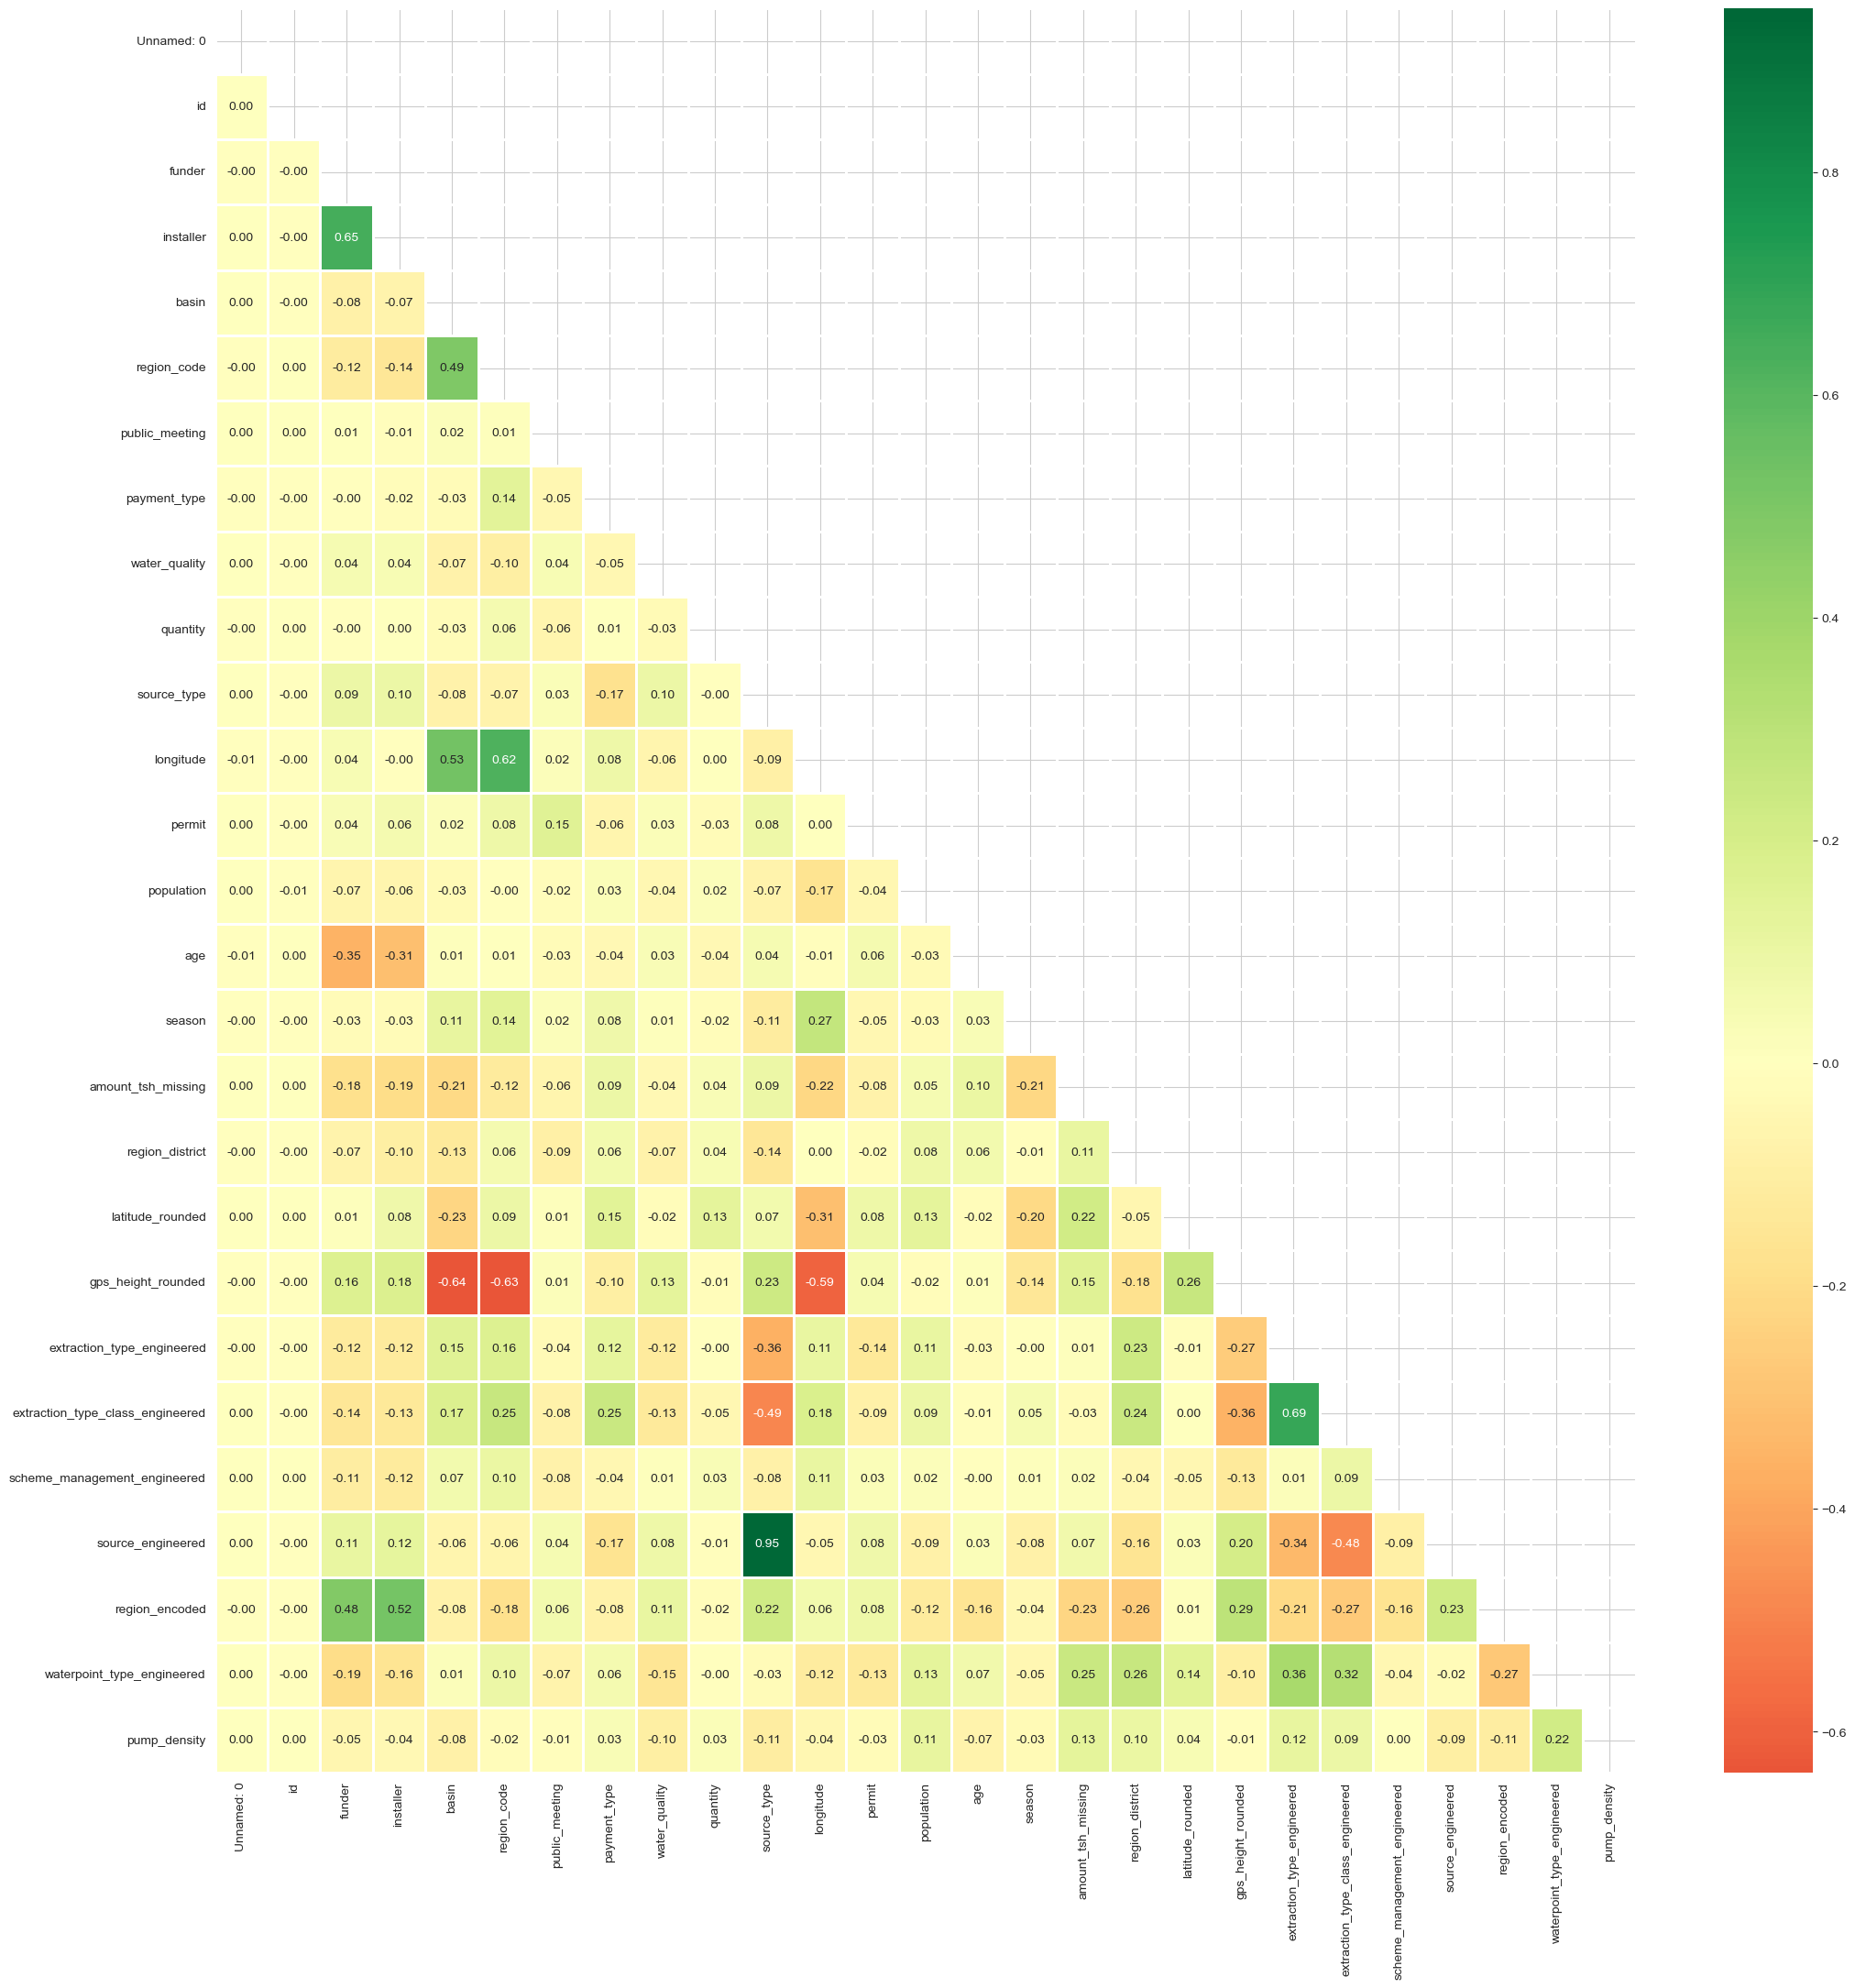

In [72]:
#define train and test 
train_set = pd.read_csv("Datasets/final_df.csv")

print(train_set.columns)

# Create the correlation matrix
corr_mean = train_set.corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(25,25)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels())
plt.show()

### Feature Types

In [70]:
table = [
    ['Feature', 'Value'],
    ['amount_tsh', 'Ratio'],
    ['date_recorded', 'Interval'],
    ['funder', 'Nominal'],
    ['gps_height', 'Interval'],
    ['installer', 'Nominal'],
    ['longitude', 'Interval'],
    ['latitude', 'Interval'],
    ['wpt_name', 'Nominal'],
    ['basin', 'Nominal'],
    ['subvillage', 'Nominal'],
    ['region', 'Nominal'],
    ['region_code', 'Nominal'],
    ['district_code', 'Nominal'],
    ['lga', 'Nominal'],
    ['ward', 'Nominal'],
    ['population', 'Ratio'],
    ['public_meeting', 'Nominal'],
    ['recorded_by', 'Nominal'],
    ['scheme_management', 'Nominal'],
    ['scheme_name', 'Nominal'],
    ['permit', 'Nominal'],
    ['construction_year', 'Interval'],
    ['extraction_type', 'Nominal'],
    ['extraction_type_group', 'Nominal'],
    ['extraction_type_class', 'Nominal'],
    ['management', 'Nominal'],
    ['management_group', 'Nominal'],
    ['payment', 'Nominal'],
    ['payment_type', 'Nominal'],
    ['water_quality', 'Nominal'],
    ['quality_group', 'Nominal'],
    ['quantity', 'Nominal'],
    ['quantity_group', 'Nominal'],
    ['source', 'Nominal'],
    ['source_type', 'Nominal'],
    ['source_class', 'Nominal'],
    ['waterpoint_type', 'Nominal'],
    ['waterpoint_type_group', 'Nominal']
]

# Create the DataFrame
types_df = pd.DataFrame(table[1:], columns=table[0])

# Print the DataFrame
print(len(types_df[types_df["Value"] == "Nominal"]))
print(len(types_df[types_df["Value"] == "Interval"]))
print(len(types_df[types_df["Value"] == "Ordinal"]))
print(len(types_df[types_df["Value"] == "Ratio"]))

31
5
0
2


### Feature Datatypes

In [73]:
train_df.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


### Distribution of Pump Functionality by Age

In [75]:
def distribution_checker (data, xlabel):
  grouped = data.groupby([xlabel, 'status_group'])['id'].count().reset_index()
  pivot = grouped.pivot_table(index = xlabel, columns = 'status_group', fill_value = 0)
  mi=pivot.columns
  mi.tolist()
  ind = pd.Index([ str(e[1])  for e in mi.tolist()])
  pivot.columns = ind
  pivot['nr_pumps'] = pivot['functional'] +pivot['functional needs repair'] +pivot['non functional']
  pivot['all_pumps'] = pivot['nr_pumps'].sum()
  pivot['perc_total_pumps'] =((pivot['nr_pumps']/pivot['all_pumps'])*100).round(1)
  pivot['perc_functional'] = ((pivot['functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_non_functional'] = ((pivot['non functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_functional_needs_repair'] = ((pivot['functional needs repair']/pivot['nr_pumps'])*100).round(1)
  pivot = pivot.drop(['functional', 'functional needs repair', 'non functional', 'all_pumps'], axis=1)
  return(pivot)

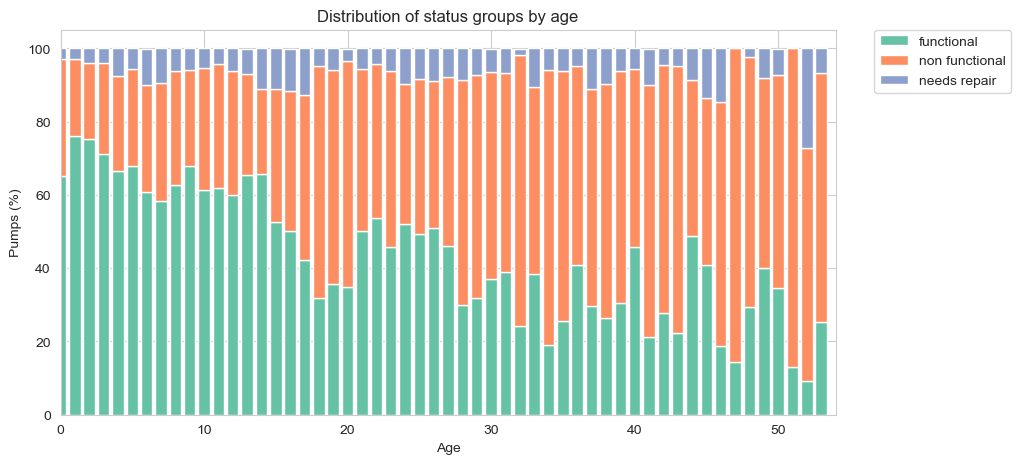

In [78]:
# Distribution of status group by age
fig, ax = plt.subplots(figsize=(10,5))
construction = distribution_checker(train_set, 'age')
labels = train_set['age'].sort_values().unique()
ax.bar(labels, construction['perc_functional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, construction['perc_non_functional'], label = 'non functional', bottom = construction['perc_functional'] , color = '#fc8e62')
ax.bar(labels, construction['perc_functional_needs_repair'], label = 'needs repair', bottom = construction['perc_functional'] + construction['perc_non_functional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by age', xlabel = 'Age', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0, 54])
plt.show()